In [4]:
import jpt
from jpt import (
    alex,
    mattea,
    load_jeopardy_dataset,
    jeopardy_benchmark,
    evaluate_jeopardy_benchmarks,
    plot_evaluations
)
import pandas as pd
import os

In [5]:
jeopardy_data = load_jeopardy_dataset(remove_unfair=True)
split_date = '2011-01-01'
jeopardy_new = [ q for q in jeopardy_data if q['air_date'] >= split_date ]
del jeopardy_data

In [7]:
mattea_benchmark_results_df = jeopardy_benchmark(
    contestant=mattea,
    dataset=jeopardy_new,
    sample_size=2000)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [12]:
mattea_benchmark_results_df['label'] = 'mattea'

In [13]:
old_benchmark_results_df = pd.read_csv(os.path.join(jpt.JEOPARDY_DATA_DIR, r'all_benchmark_results_2024-05-11.csv'))

# double check mattea's not in there
old_benchmark_results_df = old_benchmark_results_df[ old_benchmark_results_df['label'] != 'mattea' ]
old_benchmark_results_df.shape

(12000, 8)

In [14]:
all_benchmark_results_df = pd.concat([
    old_benchmark_results_df, 
    mattea_benchmark_results_df
])
all_benchmark_results_df.shape

(14000, 8)

In [15]:
jeopardy_benchmark_evaluations_df = evaluate_jeopardy_benchmarks(all_benchmark_results_df)
jeopardy_benchmark_evaluations_df

,label,successes,failures,sample_size,success_rate,standard_error,name
1,ken,1924,76,2000,0.9620,0.004288,Ken Jennings\n(gpt-4-turbo)
0,amy,1856,144,2000,0.9280,0.005788,Amy Schneider\n(gpt-3.5-fine-tuned)
5,james,1791,209,2000,0.8955,0.006846,James Holzhauer\n(gpt-3.5-turbo)
4,brad,1790,210,2000,0.8950,0.006860,Brad Rutter\n(llama3:70b)
6,mattea,1567,433,2000,0.7835,0.009212,Mattea Roach\n(llama3:8b + RAG)
2,larissa,1257,743,2000,0.6285,0.010805,Larissa Kelly\n(llama3:8b)
3,david,1196,804,2000,0.5980,0.010964,David Madden\n(llama2:7b)


In [23]:
df = jeopardy_benchmark_evaluations_df.copy()
df.reset_index(drop=True, inplace=True)

# split name/model into separate columns
name_split = df['name'].str.split('\n', expand=True)
df.insert(0, 'model', name_split[1].str[1:-1])
df.insert(0, 'Contestant', name_split[0])
df.drop(columns=['label', 'name'], inplace=True)

# formatting
df['successes'] = df['successes'].apply(lambda x: f'{x:,}')
df['failures'] = df['failures'].apply(lambda x: f'{x:,}')
df['sample_size'] = df['sample_size'].apply(lambda x: f'{x:,}')
df['success_rate'] = df['success_rate'].apply(lambda p: f'{p*100:0.2f}%')
df['standard_error'] = df['standard_error'].apply(lambda p: f'±{p*196:0.2f}%')

df.columns = ['Contestant', 'Model', 'Successes', 'Failures', 'Sample Size', 'Success Rate', '95% CI']
print(df.to_markdown(index=False))

| Contestant      | Model              | Successes   |   Failures | Sample Size   | Success Rate   | 95% CI   |
|:----------------|:-------------------|:------------|-----------:|:--------------|:---------------|:---------|
| Ken Jennings    | gpt-4-turbo        | 1,924       |         76 | 2,000         | 96.20%         | ±0.84%   |
| Amy Schneider   | gpt-3.5-fine-tuned | 1,856       |        144 | 2,000         | 92.80%         | ±1.13%   |
| James Holzhauer | gpt-3.5-turbo      | 1,791       |        209 | 2,000         | 89.55%         | ±1.34%   |
| Brad Rutter     | llama3:70b         | 1,790       |        210 | 2,000         | 89.50%         | ±1.34%   |
| Mattea Roach    | llama3:8b + RAG    | 1,567       |        433 | 2,000         | 78.35%         | ±1.81%   |
| Larissa Kelly   | llama3:8b          | 1,257       |        743 | 2,000         | 62.85%         | ±2.12%   |
| David Madden    | llama2:7b          | 1,196       |        804 | 2,000         | 59.80%         | ±2.

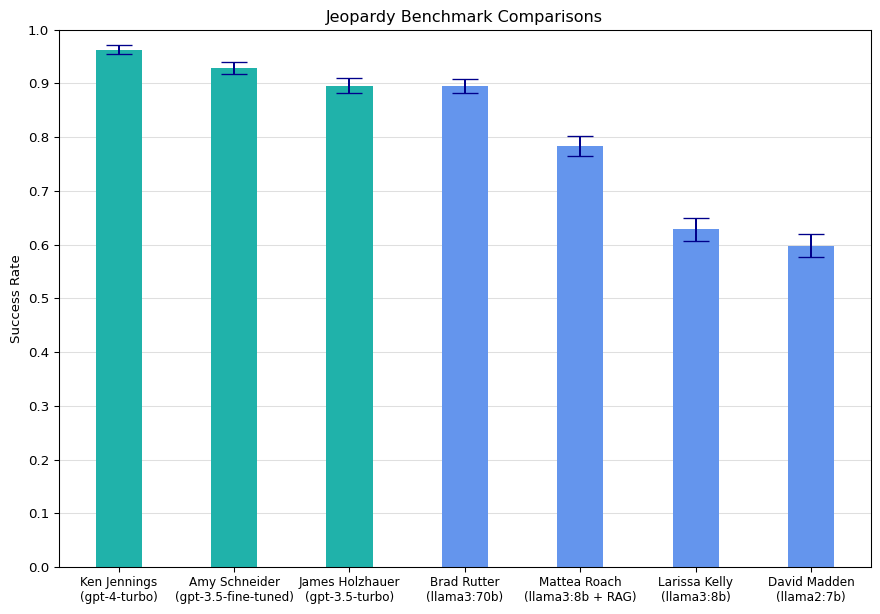

In [24]:
# Plotting the bar chart with error bars
plot_evaluations(jeopardy_benchmark_evaluations_df)

In [25]:
from util import now
timestamp = now(False)
eval_filename = os.path.join(jpt.JEOPARDY_DATA_DIR, f'jeopardy_benchmark_evaluations_{timestamp}.csv')
print('wrote', eval_filename)
jeopardy_benchmark_evaluations_df.to_csv(eval_filename, index=False)

benchmark_filename = os.path.join(jpt.JEOPARDY_DATA_DIR, f'all_benchmark_results_{timestamp}.csv')
all_benchmark_results_df.to_csv(benchmark_filename, index=False)
print('wrote', benchmark_filename)

wrote C:\Users\oloon\Dropbox\data\jeopardy\jeopardy_benchmark_evaluations_2024-05-13.csv
wrote C:\Users\oloon\Dropbox\data\jeopardy\all_benchmark_results_2024-05-13.csv
